## Problem set for class 5

1. Consider the 7 different batsman data provided to you. Compute the mean,
   median, mode, standard deviation for each of these batsmen. Store the names
   of the batsmen in a list. Then store the mean/median/mode for each batsman
   in the same order.  You should have 5 lists with you at the end of this.

In [4]:
import numpy as np
from scipy import stats  # for mode

# -------------------------------
# Step 1: Batsmen names
# -------------------------------
batsmen = ["Kohli", "Rohit", "Dhawan", "Rahane", "Pant", "Iyer", "Gill"]

# -------------------------------
# Step 2: Sample runs data (replace with your data)
# Each batsman has scores across matches
# -------------------------------
kohli_scores  = np.array([45, 67, 89, 34, 100])
rohit_scores  = np.array([22, 88, 54, 76, 120])
dhawan_scores = np.array([15, 36, 44, 80, 60])
rahane_scores = np.array([10, 20, 30, 40, 50])
pant_scores   = np.array([5, 15, 25, 35, 45])
iyer_scores   = np.array([90, 80, 70, 60, 50])
gill_scores   = np.array([33, 66, 99, 22, 11])

all_scores = [kohli_scores, rohit_scores, dhawan_scores, rahane_scores,
              pant_scores, iyer_scores, gill_scores]

# -------------------------------
# Step 3: Compute statistics for each batsman
# -------------------------------
means = []
medians = []
modes = []
stds = []

for scores in all_scores:
    means.append(np.mean(scores))
    medians.append(np.median(scores))
    mode_val = stats.mode(scores, keepdims=True).mode[0]
    modes.append(mode_val)
    stds.append(np.std(scores))

# -------------------------------
# Step 4: Print results
# -------------------------------
print("Batsmen:", batsmen)
print("Means  :", means)
print("Medians:", medians)
print("Modes  :", modes)
print("Stds   :", stds)


print("*****************Pandas Solution*******************")


import pandas as pd
import numpy as np
from scipy import stats

# Step 1: Batsmen names
batsmen = ["Kohli", "Rohit", "Dhawan", "Rahane", "Pant", "Iyer", "Gill"]

# Step 2: Sample runs data (replace with your actual data)
scores = {
    "Kohli":  [45, 67, 89, 34, 100],
    "Rohit":  [22, 88, 54, 76, 120],
    "Dhawan": [15, 36, 44, 80, 60],
    "Rahane": [10, 20, 30, 40, 50],
    "Pant":   [5, 15, 25, 35, 45],
    "Iyer":   [90, 80, 70, 60, 50],
    "Gill":   [33, 66, 99, 22, 11]
}

# Step 3: Convert to DataFrame
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in scores.items()]))

print("Runs DataFrame:\n", df)

# Step 4: Compute stats
means   = df.mean().tolist()
medians = df.median().tolist()
modes = []
for col in df.columns:
    col_data = df[col].dropna()              # drop missing values if any
    mode_val = stats.mode(col_data, keepdims=True).mode[0]
    modes.append(mode_val)
stds    = df.std().tolist()

# Step 5: Store in a summary DataFrame
summary = pd.DataFrame({
    "Batsman": batsmen,
    "Mean": means,
    "Median": medians,
    "Mode": modes,
    "StdDev": stds
})

print("\nSummary Statistics:\n", summary)




Batsmen: ['Kohli', 'Rohit', 'Dhawan', 'Rahane', 'Pant', 'Iyer', 'Gill']
Means  : [np.float64(67.0), np.float64(72.0), np.float64(47.0), np.float64(30.0), np.float64(25.0), np.float64(70.0), np.float64(46.2)]
Medians: [np.float64(67.0), np.float64(76.0), np.float64(44.0), np.float64(30.0), np.float64(25.0), np.float64(70.0), np.float64(33.0)]
Modes  : [np.int32(34), np.int32(22), np.int32(15), np.int32(10), np.int32(5), np.int32(50), np.int32(11)]
Stds   : [np.float64(25.083859352181037), np.float64(32.863353450309965), np.float64(21.963606261267753), np.float64(14.142135623730951), np.float64(14.142135623730951), np.float64(14.142135623730951), np.float64(32.183225444321145)]
*****************Pandas Solution*******************
Runs DataFrame:
    Kohli  Rohit  Dhawan  Rahane  Pant  Iyer  Gill
0     45     22      15      10     5    90    33
1     67     88      36      20    15    80    66
2     89     54      44      30    25    70    99
3     34     76      80      40    35    60   

2. Make a barchart comparing each of the batsmen. That is make 3 plots, one
   showing mean of all the batsmen (with suitable ticks), one plot for the
   median and one for the mode.

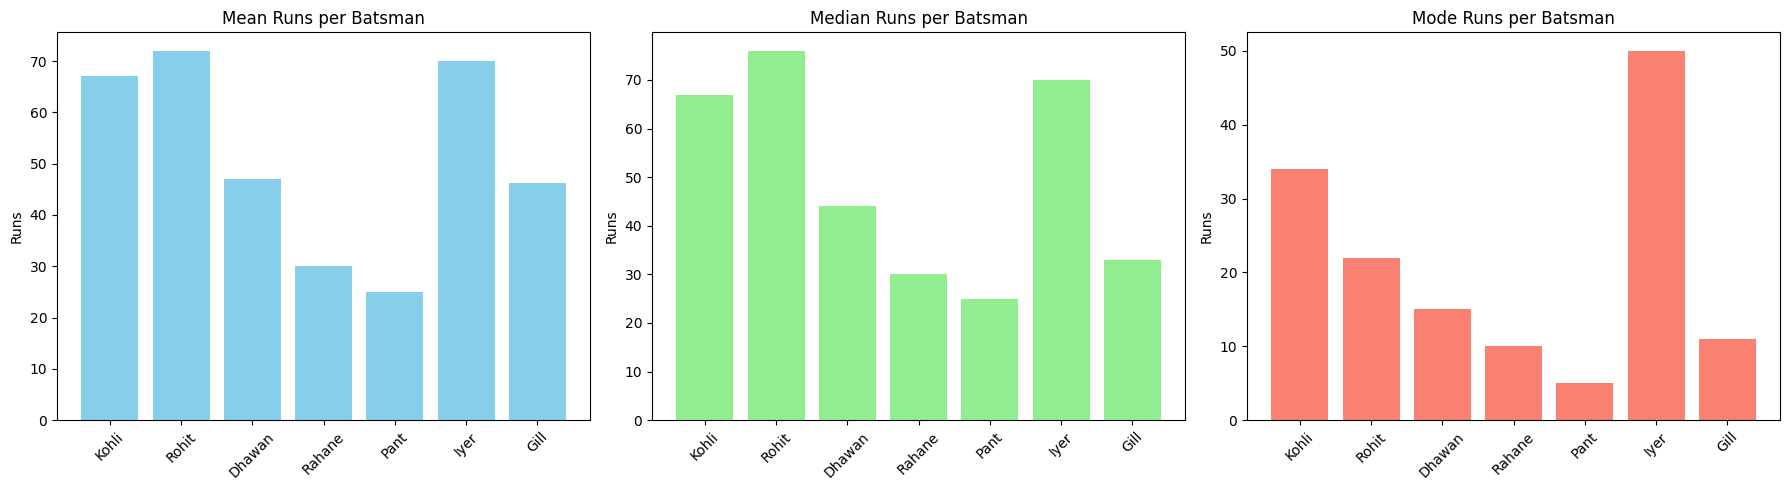

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample batsmen data
scores = {
    "Kohli":  [45, 67, 89, 34, 100],
    "Rohit":  [22, 88, 54, 76, 120],
    "Dhawan": [15, 36, 44, 80, 60],
    "Rahane": [10, 20, 30, 40, 50],
    "Pant":   [5, 15, 25, 35, 45],
    "Iyer":   [90, 80, 70, 60, 50],
    "Gill":   [33, 66, 99, 22, 11]
}

# Convert to DataFrame
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in scores.items()]))

# Calculate statistics
means   = df.mean()
medians = df.median()
modes   = df.mode().iloc[0]  # first mode if multiple

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mean plot
axes[0].bar(means.index, means.values, color="skyblue")
axes[0].set_title("Mean Runs per Batsman")
axes[0].set_ylabel("Runs")
axes[0].set_xticks(range(len(means.index)))
axes[0].set_xticklabels(means.index, rotation=45)

# Median plot
axes[1].bar(medians.index, medians.values, color="lightgreen")
axes[1].set_title("Median Runs per Batsman")
axes[1].set_ylabel("Runs")
axes[1].set_xticks(range(len(medians.index)))
axes[1].set_xticklabels(medians.index, rotation=45)

# Mode plot
axes[2].bar(modes.index, modes.values, color="salmon")
axes[2].set_title("Mode Runs per Batsman")
axes[2].set_ylabel("Runs")
axes[2].set_xticks(range(len(modes.index)))
axes[2].set_xticklabels(modes.index, rotation=45)

plt.tight_layout()
plt.show()


# Left bar chart: Mean runs for each batsman

# Middle bar chart: Median runs

# Right bar chart: Mode runs

3. Look up the documentation for `plt.errorbar` (you can look this up online
   also) and draw the means of each batsman along with an error bar
   illustrating the standard deviation of their scores.

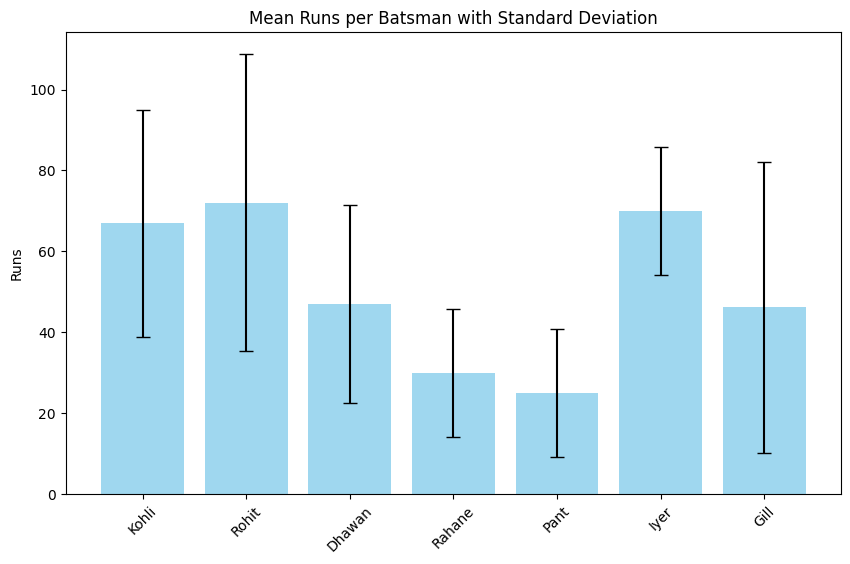

In [7]:
# Calculate standard deviations
stds = df.std()

# Plot means with error bars (std dev)
plt.figure(figsize=(10,6))
plt.bar(means.index, means.values, yerr=stds.values, capsize=5, color="skyblue", alpha=0.8)
plt.title("Mean Runs per Batsman with Standard Deviation")
plt.ylabel("Runs")
plt.xticks(rotation=45)
plt.show()



4. Plot a suitable histogram for any 4 of the batsmen and compare them, you
   can make 2 plots of two pairs or 3 plots of any 3 pairs.

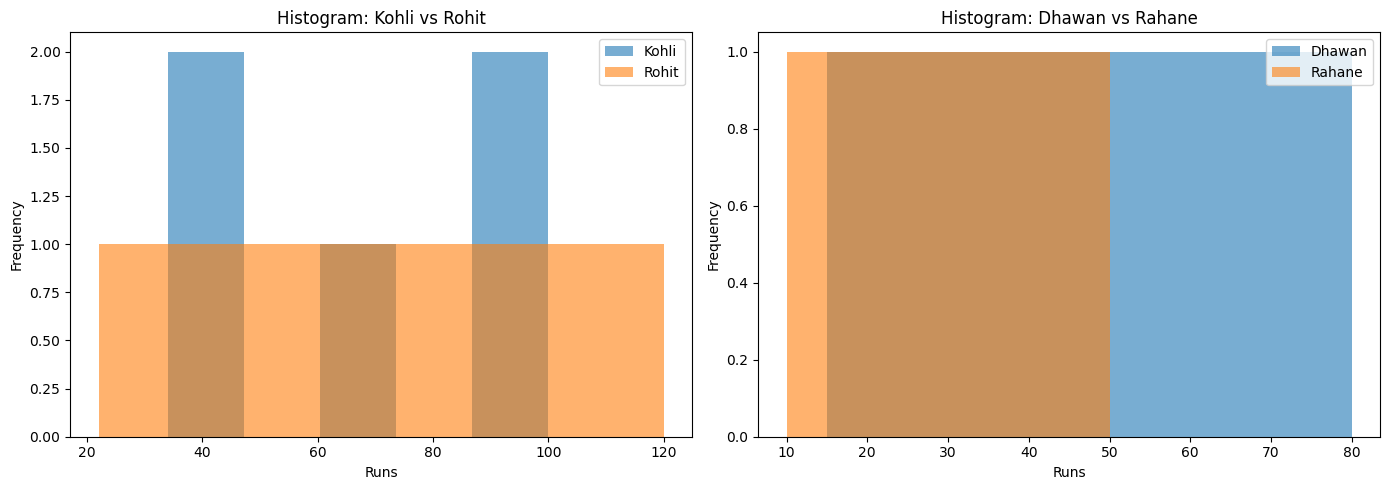

In [8]:
# Select 4 batsmen
selected_batsmen = ["Kohli", "Rohit", "Dhawan", "Rahane"]

# Plotting histograms in pairs
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# First pair: Kohli vs Rohit
axes[0].hist(df["Kohli"].dropna(), bins=5, alpha=0.6, label="Kohli")
axes[0].hist(df["Rohit"].dropna(), bins=5, alpha=0.6, label="Rohit")
axes[0].set_title("Histogram: Kohli vs Rohit")
axes[0].set_xlabel("Runs")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# Second pair: Dhawan vs Rahane
axes[1].hist(df["Dhawan"].dropna(), bins=5, alpha=0.6, label="Dhawan")
axes[1].hist(df["Rahane"].dropna(), bins=5, alpha=0.6, label="Rahane")
axes[1].set_title("Histogram: Dhawan vs Rahane")
axes[1].set_xlabel("Runs")
axes[1].set_ylabel("Frequency")
axes[1].legend()

plt.tight_layout()
plt.show()


5. Make a boxplot comparing all batsmen.

6. Make a violinplot comparing all batsmen.

7. Comment on whether it is possible to plot all 7 batsmen together as a
   histogram? Is this a good idea? Contrast this with the boxplot and
   violinplot.

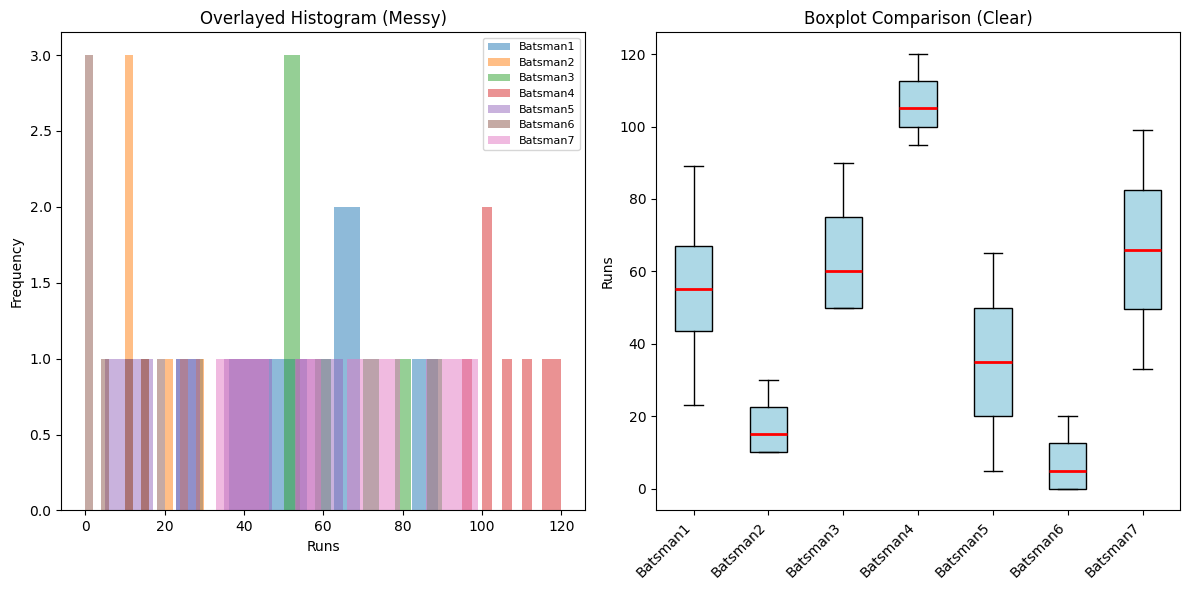

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Example batsman data
batsman_data = {
    "Batsman1": [45, 67, 23, 89, 55, 67, 42],
    "Batsman2": [10, 15, 20, 10, 25, 30, 10],
    "Batsman3": [50, 50, 50, 60, 70, 80, 90],
    "Batsman4": [100, 95, 110, 120, 115, 105, 100],
    "Batsman5": [5, 15, 25, 35, 45, 55, 65],
    "Batsman6": [0, 0, 5, 10, 0, 15, 20],
    "Batsman7": [33, 44, 55, 66, 77, 88, 99],
}

names = list(batsman_data.keys())
scores = list(batsman_data.values())

plt.figure(figsize=(12, 6))

# ❌  Attempt 1: Overlayed histogram (cluttered)
plt.subplot(1, 2, 1)
for name, vals in batsman_data.items():
    plt.hist(vals, bins=10, alpha=0.5, label=name)
plt.title("Overlayed Histogram (Messy)")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.legend(fontsize=8)

# ✅ Attempt 2: Boxplot (clean)
plt.subplot(1, 2, 2)
plt.boxplot(scores, labels=names, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="black"),
            medianprops=dict(color="red", linewidth=2))
plt.title("Boxplot Comparison (Clear)")
plt.ylabel("Runs")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()




# What You’ll See

# Left (Overlayed Histogram):

# Bars from different batsmen overlap.

# Colors mix → hard to interpret.

# Impossible to compare central tendency & spread clearly.

# Right (Boxplot):

# Each batsman’s median, spread, and outliers are shown neatly.

# Very easy to compare across 7 batsmen side by side.

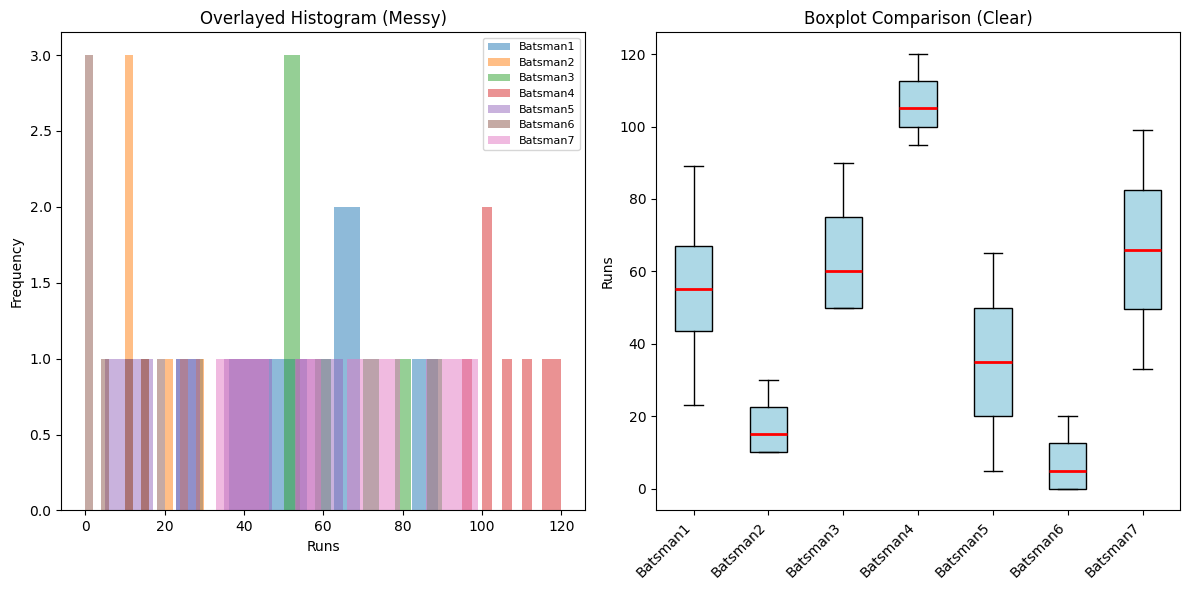

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Example batsman data
batsman_data = {
    "Batsman1": [45, 67, 23, 89, 55, 67, 42],
    "Batsman2": [10, 15, 20, 10, 25, 30, 10],
    "Batsman3": [50, 50, 50, 60, 70, 80, 90],
    "Batsman4": [100, 95, 110, 120, 115, 105, 100],
    "Batsman5": [5, 15, 25, 35, 45, 55, 65],
    "Batsman6": [0, 0, 5, 10, 0, 15, 20],
    "Batsman7": [33, 44, 55, 66, 77, 88, 99],
}

names = list(batsman_data.keys())
scores = list(batsman_data.values())

plt.figure(figsize=(12, 6))

# ❌  Attempt 1: Overlayed histogram (cluttered)
plt.subplot(1, 2, 1)
for name, vals in batsman_data.items():
    plt.hist(vals, bins=10, alpha=0.5, label=name)
plt.title("Overlayed Histogram (Messy)")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.legend(fontsize=8)

# ✅ Attempt 2: Boxplot (clean)
plt.subplot(1, 2, 2)
plt.boxplot(scores, labels=names, patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="black"),
            medianprops=dict(color="red", linewidth=2))
plt.title("Boxplot Comparison (Clear)")
plt.ylabel("Runs")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()




# What You’ll See

# Left (Overlayed Histogram):

# Bars from different batsmen overlap.

# Colors mix → hard to interpret.

# Impossible to compare central tendency & spread clearly.

# Right (Boxplot):

# Each batsman’s median, spread, and outliers are shown neatly.

# Very easy to compare across 7 batsmen side by side.